# Analisis Sentimen ulasan Shopee

setelah dilakukan preproccesing, maka tahap selanjutnya yaitu pengklasifikasian sentimen menngunakan Support Vector Machine dengan metode pembobotan TFIDF. metode kernel SVM yang digunakan pada analisis ini, terdiri dari:



*   Kernel Linear
*   Kernel Radial Basis Function (RBF)



In [ ]:
#import library
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix
import codecs
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, roc_auc_score
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(decode_error='replace',encoding='utf-8')
tf

TfidfVectorizer(decode_error='replace')

**Import data**

data yang digunakan pada pembobotan TFIDF merupakan data setelah melalui tahap pre-processing yang digabungkan kembali menjadi satu kalimat (un-tokenize).

In [ ]:
#data untuk tfidf
import pandas as pd 
import numpy as np
data = pd.read_csv('shope_tfidf.csv', usecols =['content','Klasifikasi'])
data.head(2)
len(data)

11255

melakukan pembagian data training dan data testing dengan perbandingan 80:20.

In [ ]:
from sklearn.model_selection import train_test_split
#x sebagai fitur dan y sebagai target
x=data['content']
y=data['Klasifikasi']
#split dataset into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8, random_state=1) 
print("training x_train: ",len(x_train))
print("training x_test: ",len(x_test))
print("training y_train: ",len(y_train))
print("training y_test: ",len(y_test))

training x_train:  9004
training x_test:  2251
training y_train:  9004
training y_test:  2251


**TFIDF**

Term Frequency — Inverse Document Frequency atau TF — IDF adalah suatu metode algoritma yang berguna untuk menghitung bobot setiap kata yang umum digunakan. Metode ini juga terkenal efisien, mudah dan memiliki hasil yang akurat. Metode ini akan menghitung nilai Term Frequency (TF) dan Inverse Document Frequency (IDF) pada setiap token (kata) di setiap dokumen dalam korpus. Secara sederhana, metode TF-IDF digunakan untuk mengetahui berapa sering suatu kata muncul di dalam dokumen. [link text](https://dltsierra.medium.com/algoritma-tf-idf-633e17d10a80).

library yang digunakan untuk metode pembobotan TFIDF pada analisis ini adalah sebagai berikut:
```
tf = TfidfVectorizer(decode_error='replace',encoding='utf-8')
```
kemudian langkah selanjutnya yaitu mengaplikasikan model **tf** tersebut untuk pembobotan variabel ulasan (x).

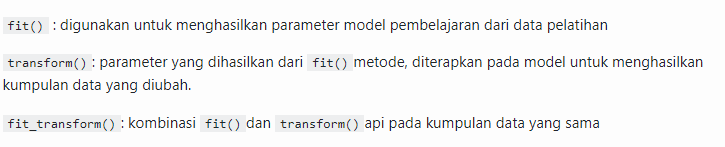

In [ ]:
x_tfidf=tf.fit_transform(x.values.astype('U'))
print(x_tfidf)

  (0, 652)	0.21846658472854555
  (0, 9512)	0.571974561454441
  (0, 4203)	0.3789606280775439
  (0, 7540)	0.3892905515154297
  (0, 7007)	0.5024891876423342
  (0, 781)	0.27832315314482586
  (1, 2091)	0.20630645321033017
  (1, 4967)	0.360729236040169
  (1, 7181)	0.2790899140368726
  (1, 1515)	0.17182085767381675
  (1, 9316)	0.3494860252026941
  (1, 4121)	0.34076511335348925
  (1, 1470)	0.6447927974125346
  (1, 6662)	0.2566697927199428
  (2, 8277)	0.6240546627527694
  (2, 7831)	0.41681713444971014
  (2, 8986)	0.5069855709726752
  (2, 4698)	0.20647262329206104
  (2, 7039)	0.24844814621954586
  (2, 3344)	0.2746406008261269
  (3, 10650)	0.4743312010017333
  (3, 3382)	0.5751570229877286
  (3, 4048)	0.6664865419977709
  (4, 5073)	0.6432848588567788
  (4, 790)	0.38519545596171423
  :	:
  (11253, 1465)	0.13756251727805213
  (11253, 971)	0.17064578217790385
  (11253, 10533)	0.12537190329111353
  (11253, 8409)	0.10935810189260861
  (11253, 6845)	0.22812489567331526
  (11253, 9718)	0.1324370054116662

In [ ]:
#melakukan pembobotan tfidf terhadap data training dan data testing variabel ulasan
x_traintf=tf.fit_transform(x_train.values.astype('U'))
x_testtf=tf.fit_transform(x_test)
#mendefiniskan variabel x, y training dan testing untuk klasikasi SVM kernel RBF
x_tfidf_rbf=x_tfidf
x_train_rbf=x_traintf
x_test_rbf=x_testtf
y_rbf=y
y_train_rbf=y_train
y_test_rbf=y_test

# Support Vector Machine (SVM) Kernel Linear

Setelah dilakukan pembobotan menggunakan TFIDF, maka langkah selanjutnya yaitu melakukan analisis klasifikasi menggunakan SVM, dimana untuk kernel yang digunakan saat ini yaitu kernel Linear.
Sebelum melakukan analisis klasifikasi SVM, langkah pertama yaitu melakukan penentuan parameter terbaik, dimana metode yang digunakan pada analisis ini yaitu metode Grid Search. Berikut merupakan code Grid Search dengan menggunakan kombinasi nilai 10^-1, 1, 10.

In [ ]:
tuned_parameters = [{'kernel':['linear'], 'C':[0.1, 1, 10]}]
scores = ['recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    tuned = GridSearchCV(SVC(), tuned_parameters, scoring='roc_auc')
    tuned.fit(x_traintf, y_train)
    print("Best parameters set found on development set:")
    print()
    print(tuned.best_params_)
    print(tuned.best_score_)
    print()
    print("Grid scores on development set:")
    print()
    means = tuned.cv_results_['mean_test_score']
    stds = tuned.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tuned.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}
0.9010575131149924

Grid scores on development set:

0.897 (+/-0.011) for {'C': 0.1, 'kernel': 'linear'}
0.901 (+/-0.016) for {'C': 1, 'kernel': 'linear'}
0.873 (+/-0.015) for {'C': 10, 'kernel': 'linear'}


Berdasarkan metode Grid Search, diperoleh parameter terbaik untuk data ulasan Shopee menggunakan SVM kernel Linear yaitu C=1. Karena kekurangan dari code tersebut, tidak diketahui nilai akurasi dan nilai AUC, maka untuk langkah selanjutnya yaitu melakukan analisis klasifikasi SVM kernel Linear dengan kombinasi nilai parameter C sebesar 10^-1, 1, dan 10. 

**Tambahan:**
karena perbandingan label kelas positif dan negatif 53:47, maka untuk analisis ini saya menggunakan metode *Stratified K-Fold*, agar setiap data training dan testing memiliki distribusi variabel label kelas yang seimbang.

*(sebelumnya pada analisis ini sudah mencoba menggunakan metode K-Fold, akan tetapi berdasarkan metode tersebut menghasilkan nilai akurasi dan AUC yang lebih kecil dibandingkan dengan metode Stratified K-Fold). Sehingga, untuk data ulasan ini, lebih dianjurkan menggunakan Stratified K-fold*

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf, y)
i = 1
for train_index, test_index in skf.split(x_tfidf, y) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train ,x_test=x_tfidf[train_index] ,x_tfidf[test_index]
    y_train, y_test=y[train_index], y[test_index]
    i+=1
    modellin = SVC(kernel='linear', probability=True, C=0.1)
    clf_lin = modellin.fit(x_train, y_train)
    pred_labels_tr = modellin.predict(x_train)
    pred_labels_te = modellin.predict(x_test)
    cm_train = confusion_matrix(y_train, pred_labels_tr)
    cm_test = confusion_matrix(y_test, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train, y_train)
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print()
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test, y_test)
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('w = ',clf_lin.coef_)
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      4746
           1       0.93      0.76      0.84      5383

    accuracy                           0.84     10129
   macro avg       0.85      0.85      0.84     10129
weighted avg       0.86      0.84      0.84     10129

--------------------------------------------------------
Accuracy Train = 84.41%
AUC Train:  0.8495072436606667
CM Train = 
[[4439  307]
 [1272 4111]]

----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       527
           1       0.91      0.75      0.82       599

    accuracy                           0.83      1126
   macro avg       0.84      0.83      0.83      1126
weighted avg       0.84      0.83      0.83      1126

-----------

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf, y)
i = 1
for train_index, test_index in skf.split(x_tfidf, y) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train ,x_test=x_tfidf[train_index] ,x_tfidf[test_index]
    y_train, y_test=y[train_index], y[test_index]
    i+=1
    modellin = SVC(kernel='linear', probability=True, C=1)
    clf_lin = modellin.fit(x_train, y_train)
    pred_labels_tr = modellin.predict(x_train)
    pred_labels_te = modellin.predict(x_test)
    cm_train = confusion_matrix(y_train, pred_labels_tr)
    cm_test = confusion_matrix(y_test, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train, y_train)
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print()
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test, y_test)
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('w = ',clf_lin.coef_)
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4746
           1       0.94      0.87      0.91      5383

    accuracy                           0.90     10129
   macro avg       0.91      0.91      0.90     10129
weighted avg       0.91      0.90      0.90     10129

--------------------------------------------------------
Accuracy Train = 90.46%
AUC Train:  0.9068696272598594
CM Train = 
[[4473  273]
 [ 693 4690]]

----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       527
           1       0.88      0.80      0.84       599

    accuracy                           0.84      1126
   macro avg       0.84      0.84      0.84      1126
weighted avg       0.84      0.84      0.84      1126

-----------

In [ ]:
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf, y)
i = 1
for train_index, test_index in skf.split(x_tfidf, y) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train ,x_test=x_tfidf[train_index] ,x_tfidf[test_index]
    y_train, y_test=y[train_index], y[test_index]
    i+=1
    modellin = SVC(kernel='linear', probability=True, C=10)
    clf_lin = modellin.fit(x_train, y_train)
    pred_labels_tr = modellin.predict(x_train)
    pred_labels_te = modellin.predict(x_test)
    cm_train = confusion_matrix(y_train, pred_labels_tr)
    cm_test = confusion_matrix(y_test, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train, y_train)
    print(classification_report(y_train, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print()
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test, y_test)
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('w = ',clf_lin.coef_)
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4746
           1       0.97      0.95      0.96      5383

    accuracy                           0.96     10129
   macro avg       0.96      0.96      0.96     10129
weighted avg       0.96      0.96      0.96     10129

--------------------------------------------------------
Accuracy Train = 95.96%
AUC Train:  0.9602272696136694
CM Train = 
[[4603  143]
 [ 266 5117]]

----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       527
           1       0.80      0.82      0.81       599

    accuracy                           0.80      1126
   macro avg       0.80      0.80      0.80      1126
weighted avg       0.80      0.80      0.80      1126

-----------

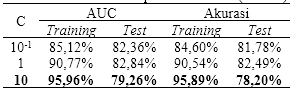

Berdasarkan hasil analisis klasifikasi SVM kernel Linear dengan menggunakan percobaan nilai parameter C sama dengan 10^-1, 1 dan 10, diperoleh nilai parameter yang menghasilkan nilai akurasi dan nilai AUC terbaik adalah ketika nilai parameter C = 10, hasil tersebut tidak sesuai dengan hasil metode Grid Search. 

# Support Vector Machine (SVM) kernel RBF

Langkah pertama yaitu menentukan nilai parameter terbaik menggunakan metode Grid Search dengan kominasi nilai parameter C dan Gamma sebesar 10^-1, 1, dan 10. 

In [ ]:
tuned_parameters_rbf = [{'kernel':['rbf'], 'C':[0.1, 1, 10], 'gamma': [0.1, 1, 10]}]
scores_rbf = ['recall']
for score_rbf in scores_rbf:
    print('# Tuning hyper-parameters for %s' % score_rbf)
    print()
    tuned_rbf = GridSearchCV(SVC(), tuned_parameters_rbf, scoring='roc_auc')
    tuned_rbf.fit(x_train_rbf, y_train_rbf)
    print("Best parameters set found on development set:")
    print()
    print(tuned_rbf.best_params_)
    print(tuned_rbf.best_score_)
    print()
    print("Grid scores on development set:")
    print()
    means_rbf = tuned_rbf.cv_results_['mean_test_score']
    stds_rbf = tuned_rbf.cv_results_['std_test_score']
for mean_rbf, std_rbf, params_rbf in zip(means_rbf, stds_rbf, tuned_rbf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean_rbf, std_rbf * 2, params_rbf))

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9030149377297778

Grid scores on development set:

0.880 (+/-0.011) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.888 (+/-0.010) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.818 (+/-0.022) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.900 (+/-0.011) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.903 (+/-0.013) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.818 (+/-0.022) for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.898 (+/-0.017) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.899 (+/-0.014) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.818 (+/-0.022) for {'C': 10, 'gamma': 10, 'kernel': 'rbf'}


Berdasarkan hasil metode Grid Search diperoleh kombinasi nilai C dan Gamma terbaik sebesar 1. Kemudian sama seperti pada kernel Linear, karena kekurangan dari code tersebut tidak diketahui nilai akurasi dan nilai AUC, maka langkah selanjutnya yaitu melakukan analisis klasifikasi SVM kernel RBF dengan kombinasi nilai parameter C dan Gamma sebesar 10^-1, 1 dan 10.

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf_rbf, y_rbf)
i = 1
for train_index, test_index in skf.split(x_tfidf_rbf, y_rbf) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train_rbf ,x_test_rbf=x_tfidf_rbf[train_index] ,x_tfidf_rbf[test_index]
    y_train_rbf, y_test_rbf=y_rbf[train_index], y_rbf[test_index]
    i+=1
    modellin = SVC(kernel='rbf', probability=True, C=0.1, gamma=0.1)
    clf_lin = modellin.fit(x_train_rbf, y_train_rbf)
    pred_labels_tr = modellin.predict(x_train_rbf)
    pred_labels_te = modellin.predict(x_test_rbf)
    cm_train = confusion_matrix(y_train_rbf, pred_labels_tr)
    cm_test = confusion_matrix(y_test_rbf, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train_rbf, y_train_rbf)
    print(classification_report(y_train_rbf, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_rbf, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test_rbf, y_test_rbf)
    print(classification_report(y_test_rbf, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test_rbf,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function =',np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      4746
           1       0.93      0.71      0.80      5383

    accuracy                           0.81     10129
   macro avg       0.83      0.82      0.81     10129
weighted avg       0.84      0.81      0.81     10129

--------------------------------------------------------
Accuracy Train = 81.38%
AUC Train:  0.82107881416258
CM Train = 
[[4446  300]
 [1586 3797]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.74      0.93      0.82       527
           1       0.92      0.71      0.80       599

    accuracy                           0.81      1126
   macro avg       0.83      0.82      0.81      1126
weighted avg       0.83      0.81      0.81      1126

--------------

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf_rbf, y_rbf)
i = 1
for train_index, test_index in skf.split(x_tfidf_rbf, y_rbf) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train_rbf ,x_test_rbf=x_tfidf_rbf[train_index] ,x_tfidf_rbf[test_index]
    y_train_rbf, y_test_rbf=y_rbf[train_index], y_rbf[test_index]
    i+=1
    modellin = SVC(kernel='rbf', probability=True, C=0.1, gamma=1)
    clf_lin = modellin.fit(x_train_rbf, y_train_rbf)
    pred_labels_tr = modellin.predict(x_train_rbf)
    pred_labels_te = modellin.predict(x_test_rbf)
    cm_train = confusion_matrix(y_train_rbf, pred_labels_tr)
    cm_test = confusion_matrix(y_test_rbf, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train_rbf, y_train_rbf)
    print(classification_report(y_train_rbf, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_rbf, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test_rbf, y_test_rbf)
    print(classification_report(y_test_rbf, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test_rbf,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function =',np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      4746
           1       0.95      0.74      0.83      5383

    accuracy                           0.84     10129
   macro avg       0.86      0.85      0.84     10129
weighted avg       0.86      0.84      0.84     10129

--------------------------------------------------------
Accuracy Train = 83.89%
AUC Train:  0.8457686905734594
CM Train = 
[[4534  212]
 [1420 3963]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.75      0.95      0.83       527
           1       0.94      0.72      0.81       599

    accuracy                           0.82      1126
   macro avg       0.84      0.83      0.82      1126
weighted avg       0.85      0.82      0.82      1126

------------

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf_rbf, y_rbf)
i = 1
for train_index, test_index in skf.split(x_tfidf_rbf, y_rbf) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train_rbf ,x_test_rbf=x_tfidf_rbf[train_index] ,x_tfidf_rbf[test_index]
    y_train_rbf, y_test_rbf=y_rbf[train_index], y_rbf[test_index]
    i+=1
    modellin = SVC(kernel='rbf', probability=True, C=0.1, gamma=10)
    clf_lin = modellin.fit(x_train_rbf, y_train_rbf)
    pred_labels_tr = modellin.predict(x_train_rbf)
    pred_labels_te = modellin.predict(x_test_rbf)
    cm_train = confusion_matrix(y_train_rbf, pred_labels_tr)
    cm_test = confusion_matrix(y_test_rbf, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train_rbf, y_train_rbf)
    print(classification_report(y_train_rbf, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_rbf, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test_rbf, y_test_rbf)
    print(classification_report(y_test_rbf, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test_rbf,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function =',np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4746
           1       0.53      1.00      0.69      5383

    accuracy                           0.53     10129
   macro avg       0.27      0.50      0.35     10129
weighted avg       0.28      0.53      0.37     10129

--------------------------------------------------------
Accuracy Train = 53.14%
AUC Train:  0.5
CM Train = 
[[   0 4746]
 [   0 5383]]
----- Evaluation on Test Data -----


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.53      1.00      0.69       599

    accuracy                           0.53      1126
   macro avg       0.27      0.50      0.35      1126
weighted avg       0.28      0.53      0.37      1126

--------------------------------------------------------
Accuracy Test = 53.20%
AUC Test:  0.5
CM Test = 
[[  0 527]
 [  0 599]]
--------------------------------------------------------
b =  [0.91048275]
Indices of support vectors =  [    1     2     3 ... 10121 10124 10128]
Number of support vectors for each class =  [4746 5338]
Coefficients of the support vector in the decision function =   (0, 0)	0.1
  (0, 1)	0.1
  (0, 2)	0.1
  (0, 3)	0.1
  (0, 4)	0.1
  (0, 5)	0.1
  (0, 6)	0.1
  (0, 7)	0.1
  (0, 8)	0.1
  (0, 9)	0.1
  (0, 10)	0.1
  (0, 11)	0.1
  (0, 12)	0.1
  (0, 13)	0.1
  (0, 14)	0.1
  (0, 15)	0.1
  (0, 16)	0.1
  (0, 17)	0.1
  (0, 18)	0.1
  (0, 19)	0.1
  (0, 20)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4746
           1       0.53      1.00      0.69      5383

    accuracy                           0.53     10129
   macro avg       0.27      0.50      0.35     10129
weighted avg       0.28      0.53      0.37     10129

--------------------------------------------------------
Accuracy Train = 53.14%
AUC Train:  0.5
CM Train = 
[[   0 4746]
 [   0 5383]]
----- Evaluation on Test Data -----


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.53      1.00      0.69       599

    accuracy                           0.53      1126
   macro avg       0.27      0.50      0.35      1126
weighted avg       0.28      0.53      0.37      1126

--------------------------------------------------------
Accuracy Test = 53.20%
AUC Test:  0.5
CM Test = 
[[  0 527]
 [  0 599]]
--------------------------------------------------------
b =  [0.91049227]
Indices of support vectors =  [    1     2     3 ... 10122 10125 10128]
Number of support vectors for each class =  [4746 5340]
Coefficients of the support vector in the decision function =   (0, 0)	0.1
  (0, 1)	0.1
  (0, 2)	0.1
  (0, 3)	0.1
  (0, 4)	0.1
  (0, 5)	0.1
  (0, 6)	0.1
  (0, 7)	0.1
  (0, 8)	0.1
  (0, 9)	0.1
  (0, 10)	0.1
  (0, 11)	0.1
  (0, 12)	0.1
  (0, 13)	0.1
  (0, 14)	0.1
  (0, 15)	0.1
  (0, 16)	0.1
  (0, 17)	0.1
  (0, 18)	0.1
  (0, 19)	0.1
  (0, 20)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4745
           1       0.53      1.00      0.69      5384

    accuracy                           0.53     10129
   macro avg       0.27      0.50      0.35     10129
weighted avg       0.28      0.53      0.37     10129

--------------------------------------------------------
Accuracy Train = 53.15%
AUC Train:  0.5
CM Train = 
[[   0 4745]
 [   0 5384]]
----- Evaluation on Test Data -----


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       528
           1       0.53      1.00      0.69       598

    accuracy                           0.53      1126
   macro avg       0.27      0.50      0.35      1126
weighted avg       0.28      0.53      0.37      1126

--------------------------------------------------------
Accuracy Test = 53.11%
AUC Test:  0.5
CM Test = 
[[  0 528]
 [  0 598]]
--------------------------------------------------------
b =  [0.91044136]
Indices of support vectors =  [    1     2     3 ... 10122 10124 10128]
Number of support vectors for each class =  [4745 5337]
Coefficients of the support vector in the decision function =   (0, 0)	0.1
  (0, 1)	0.1
  (0, 2)	0.1
  (0, 3)	0.1
  (0, 4)	0.1
  (0, 5)	0.1
  (0, 6)	0.1
  (0, 7)	0.1
  (0, 8)	0.1
  (0, 9)	0.1
  (0, 10)	0.1
  (0, 11)	0.1
  (0, 12)	0.1
  (0, 13)	0.1
  (0, 14)	0.1
  (0, 15)	0.1
  (0, 16)	0.1
  (0, 17)	0.1
  (0, 18)	0.1
  (0, 19)	0.1
  (0, 20)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4745
           1       0.53      1.00      0.69      5384

    accuracy                           0.53     10129
   macro avg       0.27      0.50      0.35     10129
weighted avg       0.28      0.53      0.37     10129

--------------------------------------------------------
Accuracy Train = 53.15%
AUC Train:  0.5
CM Train = 
[[   0 4745]
 [   0 5384]]
----- Evaluation on Test Data -----


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       528
           1       0.53      1.00      0.69       598

    accuracy                           0.53      1126
   macro avg       0.27      0.50      0.35      1126
weighted avg       0.28      0.53      0.37      1126

--------------------------------------------------------
Accuracy Test = 53.11%
AUC Test:  0.5
CM Test = 
[[  0 528]
 [  0 598]]
--------------------------------------------------------
b =  [0.9104583]
Indices of support vectors =  [    1     2     4 ... 10122 10124 10128]
Number of support vectors for each class =  [4745 5338]
Coefficients of the support vector in the decision function =   (0, 0)	0.1
  (0, 1)	0.1
  (0, 2)	0.1
  (0, 3)	0.1
  (0, 4)	0.1
  (0, 5)	0.1
  (0, 6)	0.1
  (0, 7)	0.1
  (0, 8)	0.1
  (0, 9)	0.1
  (0, 10)	0.1
  (0, 11)	0.1
  (0, 12)	0.1
  (0, 13)	0.1
  (0, 14)	0.1
  (0, 15)	0.1
  (0, 16)	0.1
  (0, 17)	0.1
  (0, 18)	0.1
  (0, 19)	0.1
  (0, 20)	

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4745
           1       0.53      1.00      0.69      5384

    accuracy                           0.53     10129
   macro avg       0.27      0.50      0.35     10129
weighted avg       0.28      0.53      0.37     10129

--------------------------------------------------------
Accuracy Train = 53.15%
AUC Train:  0.5
CM Train = 
[[   0 4745]
 [   0 5384]]
----- Evaluation on Test Data -----


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       528
           1       0.53      1.00      0.69       598

    accuracy                           0.53      1126
   macro avg       0.27      0.50      0.35      1126
weighted avg       0.28      0.53      0.37      1126

--------------------------------------------------------
Accuracy Test = 53.11%
AUC Test:  0.5
CM Test = 
[[  0 528]
 [  0 598]]
--------------------------------------------------------
b =  [0.91047667]
Indices of support vectors =  [    1     2     4 ... 10119 10123 10124]
Number of support vectors for each class =  [4745 5338]
Coefficients of the support vector in the decision function =   (0, 0)	0.1
  (0, 1)	0.1
  (0, 2)	0.1
  (0, 3)	0.1
  (0, 4)	0.1
  (0, 5)	0.1
  (0, 6)	0.1
  (0, 7)	0.1
  (0, 8)	0.1
  (0, 9)	0.1
  (0, 10)	0.1
  (0, 11)	0.1
  (0, 12)	0.1
  (0, 13)	0.1
  (0, 14)	0.1
  (0, 15)	0.1
  (0, 16)	0.1
  (0, 17)	0.1
  (0, 18)	0.1
  (0, 19)	0.1
  (0, 20)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4746
           1       0.53      1.00      0.69      5384

    accuracy                           0.53     10130
   macro avg       0.27      0.50      0.35     10130
weighted avg       0.28      0.53      0.37     10130

--------------------------------------------------------
Accuracy Train = 53.15%
AUC Train:  0.5
CM Train = 
[[   0 4746]
 [   0 5384]]
----- Evaluation on Test Data -----


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.53      1.00      0.69       598

    accuracy                           0.53      1125
   macro avg       0.27      0.50      0.35      1125
weighted avg       0.28      0.53      0.37      1125

--------------------------------------------------------
Accuracy Test = 53.16%
AUC Test:  0.5
CM Test = 
[[  0 527]
 [  0 598]]
--------------------------------------------------------
b =  [0.91052496]
Indices of support vectors =  [    1     2     3 ... 10122 10125 10129]
Number of support vectors for each class =  [4746 5342]
Coefficients of the support vector in the decision function =   (0, 0)	0.1
  (0, 1)	0.1
  (0, 2)	0.1
  (0, 3)	0.1
  (0, 4)	0.1
  (0, 5)	0.1
  (0, 6)	0.1
  (0, 7)	0.1
  (0, 8)	0.1
  (0, 9)	0.1
  (0, 10)	0.1
  (0, 11)	0.1
  (0, 12)	0.1
  (0, 13)	0.1
  (0, 14)	0.1
  (0, 15)	0.1
  (0, 16)	0.1
  (0, 17)	0.1
  (0, 18)	0.1
  (0, 19)	0.1
  (0, 20)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4746
           1       0.53      1.00      0.69      5384

    accuracy                           0.53     10130
   macro avg       0.27      0.50      0.35     10130
weighted avg       0.28      0.53      0.37     10130

--------------------------------------------------------
Accuracy Train = 53.15%
AUC Train:  0.5
CM Train = 
[[   0 4746]
 [   0 5384]]
----- Evaluation on Test Data -----


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.53      1.00      0.69       598

    accuracy                           0.53      1125
   macro avg       0.27      0.50      0.35      1125
weighted avg       0.28      0.53      0.37      1125

--------------------------------------------------------
Accuracy Test = 53.16%
AUC Test:  0.5
CM Test = 
[[  0 527]
 [  0 598]]
--------------------------------------------------------
b =  [0.91048885]
Indices of support vectors =  [    1     2     3 ... 10122 10125 10129]
Number of support vectors for each class =  [4746 5340]
Coefficients of the support vector in the decision function =   (0, 0)	0.1
  (0, 1)	0.1
  (0, 2)	0.1
  (0, 3)	0.1
  (0, 4)	0.1
  (0, 5)	0.1
  (0, 6)	0.1
  (0, 7)	0.1
  (0, 8)	0.1
  (0, 9)	0.1
  (0, 10)	0.1
  (0, 11)	0.1
  (0, 12)	0.1
  (0, 13)	0.1
  (0, 14)	0.1
  (0, 15)	0.1
  (0, 16)	0.1
  (0, 17)	0.1
  (0, 18)	0.1
  (0, 19)	0.1
  (0, 20)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4746
           1       0.53      1.00      0.69      5384

    accuracy                           0.53     10130
   macro avg       0.27      0.50      0.35     10130
weighted avg       0.28      0.53      0.37     10130

--------------------------------------------------------
Accuracy Train = 53.15%
AUC Train:  0.5
CM Train = 
[[   0 4746]
 [   0 5384]]
----- Evaluation on Test Data -----


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.53      1.00      0.69       598

    accuracy                           0.53      1125
   macro avg       0.27      0.50      0.35      1125
weighted avg       0.28      0.53      0.37      1125

--------------------------------------------------------
Accuracy Test = 53.16%
AUC Test:  0.5
CM Test = 
[[  0 527]
 [  0 598]]
--------------------------------------------------------
b =  [0.91061063]
Indices of support vectors =  [    1     2     3 ... 10122 10125 10129]
Number of support vectors for each class =  [4746 5344]
Coefficients of the support vector in the decision function =   (0, 0)	0.1
  (0, 1)	0.1
  (0, 2)	0.1
  (0, 3)	0.1
  (0, 4)	0.1
  (0, 5)	0.1
  (0, 6)	0.1
  (0, 7)	0.1
  (0, 8)	0.1
  (0, 9)	0.1
  (0, 10)	0.1
  (0, 11)	0.1
  (0, 12)	0.1
  (0, 13)	0.1
  (0, 14)	0.1
  (0, 15)	0.1
  (0, 16)	0.1
  (0, 17)	0.1
  (0, 18)	0.1
  (0, 19)	0.1
  (0, 20)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4746
           1       0.53      1.00      0.69      5384

    accuracy                           0.53     10130
   macro avg       0.27      0.50      0.35     10130
weighted avg       0.28      0.53      0.37     10130

--------------------------------------------------------
Accuracy Train = 53.15%
AUC Train:  0.5
CM Train = 
[[   0 4746]
 [   0 5384]]
----- Evaluation on Test Data -----


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.53      1.00      0.69       598

    accuracy                           0.53      1125
   macro avg       0.27      0.50      0.35      1125
weighted avg       0.28      0.53      0.37      1125

--------------------------------------------------------
Accuracy Test = 53.16%
AUC Test:  0.5
CM Test = 
[[  0 527]
 [  0 598]]
--------------------------------------------------------
b =  [0.91056639]
Indices of support vectors =  [    1     2     4 ... 10122 10125 10129]
Number of support vectors for each class =  [4746 5345]
Coefficients of the support vector in the decision function =   (0, 0)	0.1
  (0, 1)	0.1
  (0, 2)	0.1
  (0, 3)	0.1
  (0, 4)	0.1
  (0, 5)	0.1
  (0, 6)	0.1
  (0, 7)	0.1
  (0, 8)	0.1
  (0, 9)	0.1
  (0, 10)	0.1
  (0, 11)	0.1
  (0, 12)	0.1
  (0, 13)	0.1
  (0, 14)	0.1
  (0, 15)	0.1
  (0, 16)	0.1
  (0, 17)	0.1
  (0, 18)	0.1
  (0, 19)	0.1
  (0, 20)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4746
           1       0.53      1.00      0.69      5384

    accuracy                           0.53     10130
   macro avg       0.27      0.50      0.35     10130
weighted avg       0.28      0.53      0.37     10130

--------------------------------------------------------
Accuracy Train = 53.15%
AUC Train:  0.5
CM Train = 
[[   0 4746]
 [   0 5384]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.53      1.00      0.69       598

    accuracy                           0.53      1125
   macro avg       0.27      0.50      0.35      1125
weighted avg       0.28      0.53      0.37      1125

--------------------------------------------------------
Accuracy Test = 53.16%
AUC Test:  0.5
CM Test = 
[[  0 527]
 [  0 598]]
---------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf_rbf, y_rbf)
i = 1
for train_index, test_index in skf.split(x_tfidf_rbf, y_rbf) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train_rbf ,x_test_rbf=x_tfidf_rbf[train_index] ,x_tfidf_rbf[test_index]
    y_train_rbf, y_test_rbf=y_rbf[train_index], y_rbf[test_index]
    i+=1
    modellin = SVC(kernel='rbf', probability=True, C=1, gamma=0.1)
    clf_lin = modellin.fit(x_train_rbf, y_train_rbf)
    pred_labels_tr = modellin.predict(x_train_rbf)
    pred_labels_te = modellin.predict(x_test_rbf)
    cm_train = confusion_matrix(y_train_rbf, pred_labels_tr)
    cm_test = confusion_matrix(y_test_rbf, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train_rbf, y_train_rbf)
    print(classification_report(y_train_rbf, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_rbf, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test_rbf, y_test_rbf)
    print(classification_report(y_test_rbf, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test_rbf,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function =',np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      4746
           1       0.93      0.79      0.86      5383

    accuracy                           0.86     10129
   macro avg       0.87      0.86      0.86     10129
weighted avg       0.87      0.86      0.86     10129

--------------------------------------------------------
Accuracy Train = 85.94%
AUC Train:  0.8639044199564125
CM Train = 
[[4439  307]
 [1117 4266]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       527
           1       0.92      0.76      0.83       599

    accuracy                           0.84      1126
   macro avg       0.84      0.84      0.84      1126
weighted avg       0.85      0.84      0.84      1126

------------

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf_rbf, y_rbf)
i = 1
for train_index, test_index in skf.split(x_tfidf_rbf, y_rbf) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train_rbf ,x_test_rbf=x_tfidf_rbf[train_index] ,x_tfidf_rbf[test_index]
    y_train_rbf, y_test_rbf=y_rbf[train_index], y_rbf[test_index]
    i+=1
    modellin = SVC(kernel='rbf', probability=True, C=1, gamma=1)
    clf_lin = modellin.fit(x_train_rbf, y_train_rbf)
    pred_labels_tr = modellin.predict(x_train_rbf)
    pred_labels_te = modellin.predict(x_test_rbf)
    cm_train = confusion_matrix(y_train_rbf, pred_labels_tr)
    cm_test = confusion_matrix(y_test_rbf, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train_rbf, y_train_rbf)
    print(classification_report(y_train_rbf, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_rbf, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test_rbf, y_test_rbf)
    print(classification_report(y_test_rbf, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test_rbf,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function =',np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4746
           1       0.99      0.94      0.96      5383

    accuracy                           0.96     10129
   macro avg       0.96      0.96      0.96     10129
weighted avg       0.96      0.96      0.96     10129

--------------------------------------------------------
Accuracy Train = 96.09%
AUC Train:  0.9624196572077396
CM Train = 
[[4682   64]
 [ 332 5051]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       527
           1       0.90      0.79      0.84       599

    accuracy                           0.84      1126
   macro avg       0.85      0.85      0.84      1126
weighted avg       0.85      0.84      0.84      1126

------------

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf_rbf, y_rbf)
i = 1
for train_index, test_index in skf.split(x_tfidf_rbf, y_rbf) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train_rbf ,x_test_rbf=x_tfidf_rbf[train_index] ,x_tfidf_rbf[test_index]
    y_train_rbf, y_test_rbf=y_rbf[train_index], y_rbf[test_index]
    i+=1
    modellin = SVC(kernel='rbf', probability=True, C=1, gamma=1)
    clf_lin = modellin.fit(x_train_rbf, y_train_rbf)
    pred_labels_tr = modellin.predict(x_train_rbf)
    pred_labels_te = modellin.predict(x_test_rbf)
    cm_train = confusion_matrix(y_train_rbf, pred_labels_tr)
    cm_test = confusion_matrix(y_test_rbf, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train_rbf, y_train_rbf)
    print(classification_report(y_train_rbf, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_rbf, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test_rbf, y_test_rbf)
    print(classification_report(y_test_rbf, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test_rbf,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function =',np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4746
           1       0.99      0.94      0.96      5383

    accuracy                           0.96     10129
   macro avg       0.96      0.96      0.96     10129
weighted avg       0.96      0.96      0.96     10129

--------------------------------------------------------
Accuracy Train = 96.09%
AUC Train:  0.9624196572077396
CM Train = 
[[4682   64]
 [ 332 5051]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       527
           1       0.90      0.79      0.84       599

    accuracy                           0.84      1126
   macro avg       0.85      0.85      0.84      1126
weighted avg       0.85      0.84      0.84      1126

------------

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf_rbf, y_rbf)
i = 1
for train_index, test_index in skf.split(x_tfidf_rbf, y_rbf) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train_rbf ,x_test_rbf=x_tfidf_rbf[train_index] ,x_tfidf_rbf[test_index]
    y_train_rbf, y_test_rbf=y_rbf[train_index], y_rbf[test_index]
    i+=1
    modellin = SVC(kernel='rbf', probability=True, C=1, gamma=10)
    clf_lin = modellin.fit(x_train_rbf, y_train_rbf)
    pred_labels_tr = modellin.predict(x_train_rbf)
    pred_labels_te = modellin.predict(x_test_rbf)
    cm_train = confusion_matrix(y_train_rbf, pred_labels_tr)
    cm_test = confusion_matrix(y_test_rbf, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train_rbf, y_train_rbf)
    print(classification_report(y_train_rbf, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_rbf, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test_rbf, y_test_rbf)
    print(classification_report(y_test_rbf, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test_rbf,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function =',np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4746
           1       1.00      1.00      1.00      5383

    accuracy                           1.00     10129
   macro avg       1.00      1.00      1.00     10129
weighted avg       1.00      1.00      1.00     10129

--------------------------------------------------------
Accuracy Train = 99.97%
AUC Train:  0.9996839443742099
CM Train = 
[[4743    3]
 [   0 5383]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       527
           1       0.53      1.00      0.69       599

    accuracy                           0.53      1126
   macro avg       0.77      0.50      0.35      1126
weighted avg       0.75      0.53      0.37      1126

------------

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf_rbf, y_rbf)
i = 1
for train_index, test_index in skf.split(x_tfidf_rbf, y_rbf) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train_rbf ,x_test_rbf=x_tfidf_rbf[train_index] ,x_tfidf_rbf[test_index]
    y_train_rbf, y_test_rbf=y_rbf[train_index], y_rbf[test_index]
    i+=1
    modellin = SVC(kernel='rbf', probability=True, C=10, gamma=0.1)
    clf_lin = modellin.fit(x_train_rbf, y_train_rbf)
    pred_labels_tr = modellin.predict(x_train_rbf)
    pred_labels_te = modellin.predict(x_test_rbf)
    cm_train = confusion_matrix(y_train_rbf, pred_labels_tr)
    cm_test = confusion_matrix(y_test_rbf, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train_rbf, y_train_rbf)
    print(classification_report(y_train_rbf, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_rbf, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test_rbf, y_test_rbf)
    print(classification_report(y_test_rbf, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test_rbf,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function =',np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      4746
           1       0.97      0.91      0.94      5383

    accuracy                           0.94     10129
   macro avg       0.94      0.94      0.94     10129
weighted avg       0.94      0.94      0.94     10129

--------------------------------------------------------
Accuracy Train = 93.58%
AUC Train:  0.9374929103256893
CM Train = 
[[4575  171]
 [ 479 4904]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       527
           1       0.86      0.81      0.83       599

    accuracy                           0.83      1126
   macro avg       0.83      0.83      0.83      1126
weighted avg       0.83      0.83      0.83      1126

------------

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf_rbf, y_rbf)
i = 1
for train_index, test_index in skf.split(x_tfidf_rbf, y_rbf) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train_rbf ,x_test_rbf=x_tfidf_rbf[train_index] ,x_tfidf_rbf[test_index]
    y_train_rbf, y_test_rbf=y_rbf[train_index], y_rbf[test_index]
    i+=1
    modellin = SVC(kernel='rbf', probability=True, C=10, gamma=1)
    clf_lin = modellin.fit(x_train_rbf, y_train_rbf)
    pred_labels_tr = modellin.predict(x_train_rbf)
    pred_labels_te = modellin.predict(x_test_rbf)
    cm_train = confusion_matrix(y_train_rbf, pred_labels_tr)
    cm_test = confusion_matrix(y_test_rbf, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train_rbf, y_train_rbf)
    print(classification_report(y_train_rbf, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_rbf, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test_rbf, y_test_rbf)
    print(classification_report(y_test_rbf, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test_rbf,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function =',np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4746
           1       1.00      1.00      1.00      5383

    accuracy                           1.00     10129
   macro avg       1.00      1.00      1.00     10129
weighted avg       1.00      1.00      1.00     10129

--------------------------------------------------------
Accuracy Train = 99.96%
AUC Train:  0.9996035262327537
CM Train = 
[[4744    2]
 [   2 5381]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       527
           1       0.87      0.81      0.84       599

    accuracy                           0.84      1126
   macro avg       0.84      0.84      0.84      1126
weighted avg       0.84      0.84      0.84      1126

------------

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
skf.get_n_splits(x_tfidf_rbf, y_rbf)
i = 1
for train_index, test_index in skf.split(x_tfidf_rbf, y_rbf) :
    print("Fold ",i)
    print("TRAIN :",train_index,"TEST :",test_index)
    x_train_rbf ,x_test_rbf=x_tfidf_rbf[train_index] ,x_tfidf_rbf[test_index]
    y_train_rbf, y_test_rbf=y_rbf[train_index], y_rbf[test_index]
    i+=1
    modellin = SVC(kernel='rbf', probability=True, C=10, gamma=10)
    clf_lin = modellin.fit(x_train_rbf, y_train_rbf)
    pred_labels_tr = modellin.predict(x_train_rbf)
    pred_labels_te = modellin.predict(x_test_rbf)
    cm_train = confusion_matrix(y_train_rbf, pred_labels_tr)
    cm_test = confusion_matrix(y_test_rbf, pred_labels_te)
    print('----- Evaluation on Training Data -----')
    score_tr = modellin.score(x_train_rbf, y_train_rbf)
    print(classification_report(y_train_rbf, pred_labels_tr))
    print('--------------------------------------------------------')
    print("Accuracy Train = {:.2f}%".format(score_tr*100))
    print("AUC Train: ", roc_auc_score(y_train_rbf, pred_labels_tr))
    print("CM Train = ")
    print(cm_train)
    print('----- Evaluation on Test Data -----')
    score_te = modellin.score(x_test_rbf, y_test_rbf)
    print(classification_report(y_test_rbf, pred_labels_te))
    print('--------------------------------------------------------')
    print("Accuracy Test = {:.2f}%".format(score_te*100))
    print("AUC Test: ", roc_auc_score(y_test_rbf,pred_labels_te))
    print("CM Test = ")
    print(cm_test)
    print('--------------------------------------------------------')
    print('b = ',clf_lin.intercept_)
    print('Indices of support vectors = ', clf_lin.support_)
    print('Number of support vectors for each class = ', clf_lin.n_support_)
    print('Coefficients of the support vector in the decision function =',np.abs(clf_lin.dual_coef_))
    print('--------------------------------------------------------')

Fold  1
TRAIN : [    0     1     2 ... 11252 11253 11254] TEST : [   12    14    41 ... 11229 11242 11244]
----- Evaluation on Training Data -----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4746
           1       1.00      1.00      1.00      5383

    accuracy                           1.00     10129
   macro avg       1.00      1.00      1.00     10129
weighted avg       1.00      1.00      1.00     10129

--------------------------------------------------------
Accuracy Train = 99.97%
AUC Train:  0.9996839443742099
CM Train = 
[[4743    3]
 [   0 5383]]
----- Evaluation on Test Data -----
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       527
           1       0.53      1.00      0.69       599

    accuracy                           0.53      1126
   macro avg       0.77      0.50      0.35      1126
weighted avg       0.75      0.53      0.37      1126

------------

Berikut merupakan hasil analisis klasifikasi SVM kernel RBF dengan kombinasi nilai parameter C dan Gamma sebesar 10^-1, 1, 10.

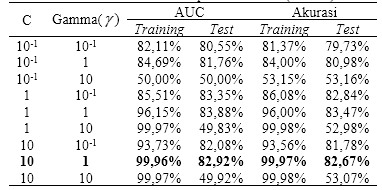

Berdasarkan hasil tersebut, diketahui bahwa nilai parameter terbaik yaitu nilai parameter C sebesar 10 dan nilai Gamma sebesar 1. Hasil tersebut, menunjukkan bahwa antara metode Grid Search dan perhitungan secara manual satu persatu kombinasi, memberikan hasil bahwa terdapat perbedaan, dimana nilai akurasi dan nilai AUC terbaik diperoleh dengan nilai parameter C = 10 dan Gamma = 1.